In [152]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

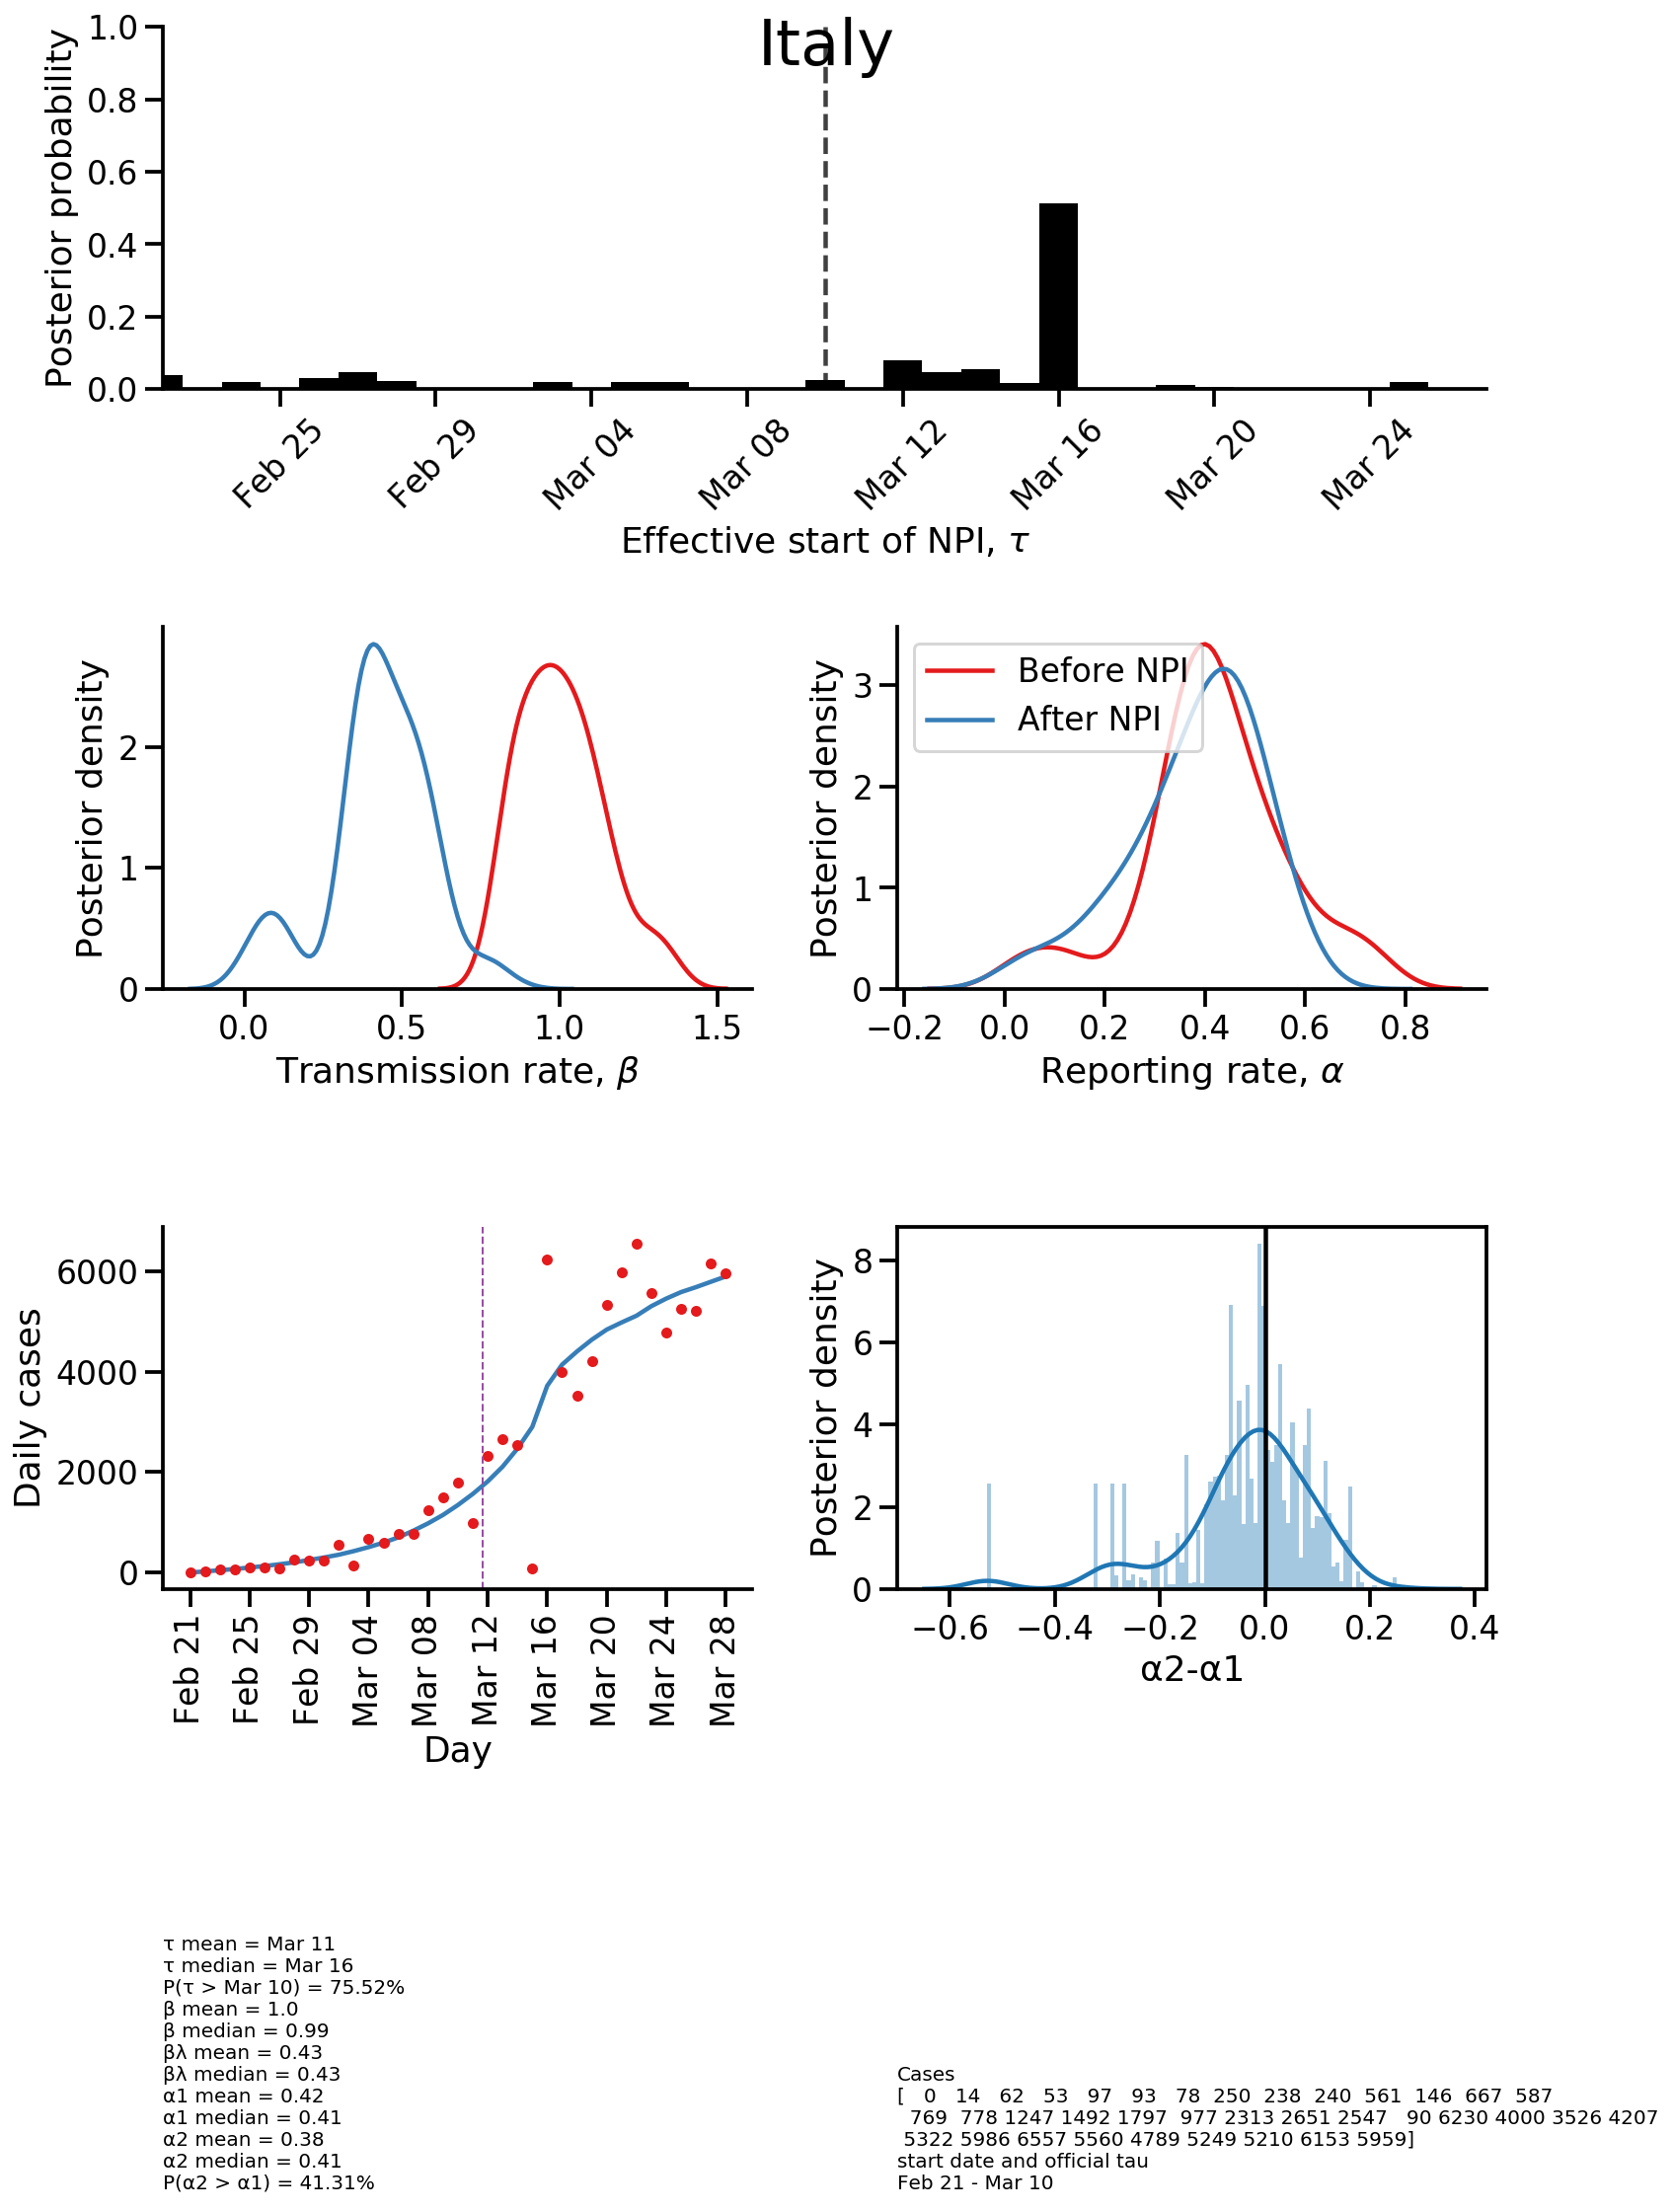

In [160]:
country_name = 'Italy'
# file_name = '../output/25-Apr_03-ysum-and-initdate-fixes/inference/{}.npz'.format(country_name)
# file_name = '../output/25-Apr-ode-bug-fix/inference/{}.npz'.format(country_name)
file_name = '../output-tmp/2020-04-27-test/inference/{}.npz'.format(country_name)
load_data(file_name)
plot_all();

TypeError: sequence item 0: expected str instance, tuple found

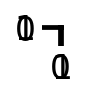

In [56]:
means = [sample[:,i].mean() for i in range(len(var_names))]
medians = [np.median(sample[:,i]) for i in range(len(var_names))]
z = list(zip(var_names,means,medians))
    
fig, ax = plt.subplots(figsize=(0.01,0.01))
txt = '\n'.join(m)
plt.text(0,0,txt,fontsize=10)
plt.setp(ax, frame_on=False, xticks=(), yticks=());
plt.show()

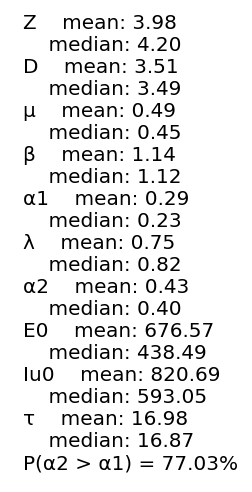

In [83]:
txt = ['{}    mean: {:.2f}\n    median: {:.2f}'.format(t[0],t[1],t[2]) for t in zip(var_names,means,medians)]

α1_posterior = sample[:,var_names.index('α1')]
α2_posterior = sample[:,var_names.index('α2')]
Δα_posterior = α2_posterior - α1_posterior
txt.append('P(α2 > α1) = {:.2%}'.format((Δα_posterior > 0).mean()))

τ_mean = τ_posterior.mean()
τ_median = np.median(τ_posterior)
printt('τ mean = {}'.format(tau_to_string(τ_mean)))
printt('τ median = {}'.format(tau_to_string(τ_median)))
confidence = 'P(τ > {}) = {:.2%}'.format(tau_to_string(official_τ), (τ_posterior > official_τ).mean())

txt = '\n'.join(txt)
fig, ax = plt.subplots(figsize=(0.01,0.01))
plt.text(0,0,txt,fontsize=10)
plt.setp(ax, frame_on=False, xticks=(), yticks=());
plt.show()

In [ ]:
τ_mean = τ_posterior.mean()
τ_median = np.median(τ_posterior)
printt('τ mean = {}'.format(tau_to_string(τ_mean)))
printt('τ median = {}'.format(tau_to_string(τ_median)))
confidence = 'P(τ > {}) = {:.2%}'.format(tau_to_string(official_τ), (τ_posterior > official_τ).mean())

In [86]:
t_mean = tau_to_string(sample[:,var_names.index('τ')].mean())
t_median = tau_to_string(sample[:,var_names.index('τ')].mean())

'Mar 17'